## DRILL Descriptive Statistics and normality
To complete the following drills, you'll need to use your Python skills to create some datasets, then use your new statistical knowledge to summarize them. Choose 6 distributions from the list of random distributions available in NumPy, called “Distributions”

For each distribution:

Generate a random variable with 100 datapoints using the code distributionvar = np.random.distributionname([arguments], 100), replacing distributionvar with an appropriate variable name and distributionname with the name of the distribution you’ve chosen, and filling in the empty space in the parentheses with your chosen values for the appropriate parameters. If you feel uncertain about how to do this, go back to the “Other Distributions” assignment for examples of code to use as a starting point.
Graph the variable using a histogram.
Compute the mean and standard deviation and plot them as vertical lines on the histogram. (Hint: the “When Does It Break?” assignment you just completed can help you here.)
Evaluate whether the descriptive statistics provided useful information about the variable. Can you identify any common characteristics of the distributions that could be usefully described using the mean and/or standard deviation, versus the ones that could not?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

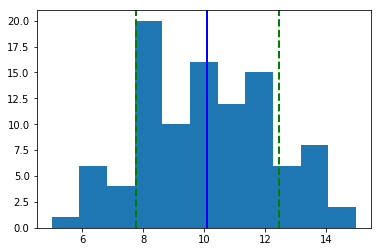

In [2]:
# I'm going to start by sampling two binomial distributions, both sampling the __sum__ of 20
# draws from a binomial population.  The first will be quite symmetric (p=0.50) and will 
# therefor closely approximate a normal distribution.  The second will be very skewed (p=0.05)
# and will therefor not approximate a normal distribution

# The mean, median, and mode are all very close to the same thing - around 10 as would 
# be expected.


binomial1 = np.random.binomial(20,.5,100)
plt.hist(binomial1, linestyle = "solid",bins=11)
plt.axvline(binomial1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(binomial1.mean()+binomial1.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(binomial1.mean()-binomial1.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

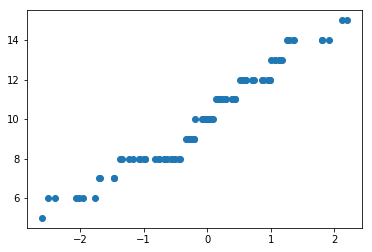

In [3]:
# as n*p = 10 in this case, we are just on the line of what "should" appear normal. 
# I'll run a NQP to show that this distribution is approximately "normal"

binomial1.sort()
norm = np.random.normal(0,1,100)
norm.sort()
plt.plot(norm,binomial1,"o")

plt.show()

### Skewed Binomial (p=0.05)

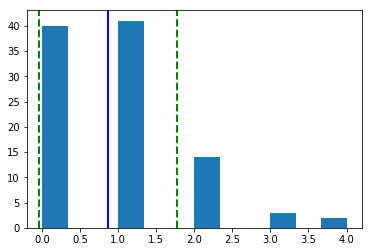

In [4]:
# As I stated above, the second will be very skewed (p=0.05)
# and will therefor not approximate a normal distribution, at
# least not with n=20.

# The mean is still occuring at the tallest histogram bar, but due to skewing,
# the mean will be greater than the median

binomial2 = np.random.binomial(20,.05,100)
plt.hist(binomial2, linestyle = "solid",bins=12)
plt.axvline(binomial2.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(binomial2.mean()+binomial2.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(binomial2.mean()-binomial2.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

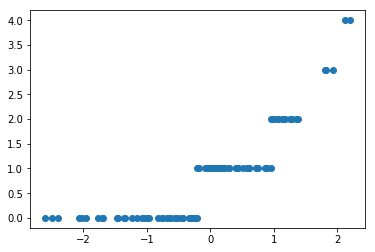

In [5]:
# as n*p = 1 in this case, we are far below what would appear normal. 
# I'll run a NQP to show that this distribution isn't close to "normal"

binomial2.sort()
plt.plot(norm,binomial2,"o")
plt.show()

The NQP is not remotely linear.  This distribution is decidedly not normal.

### Hypergeometric 
The **Hypergeometric distribution** is very much like the Binomial distribution except samples of size n are taken _without_ replacement.

In this example I will start with 50 "success" balls and 50 "failure" balls and pull samples of size 20.  I'm expecting that this distribution will be much like the Binomial with p=0.5 and should also approximate a normal distribution well.

In [6]:
hypergeo1 = np.random.hypergeometric(50, 50, 20, 100)
print(hypergeo1.mean())
print(hypergeo1.std())

10.09
2.258738586025395


As we'd expect, we had very close to half of the draws as 'successes'.

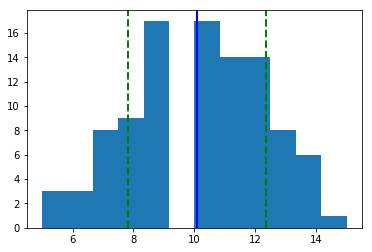

In [7]:
plt.hist(hypergeo1, linestyle = "solid",bins=12)
plt.axvline(hypergeo1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(hypergeo1.mean()+hypergeo1.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(hypergeo1.mean()-hypergeo1.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

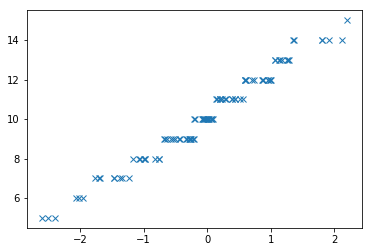

In [8]:
hypergeo1.sort()
plt.plot(norm,hypergeo1,'x')
plt.show()

### Hypergeometric (skewed)
The **Hypergeometric distribution** is very much like the Binomial distribution except samples of size n are taken _without_ replacement.

In this example I will start with 20 "success" balls and 80 "failure" balls and pull samples of size 20.  I'm expecting that this distribution will be much like the Binomial with p=0.2 but that the mean will probably be below the 4 we would expect from sampling with replacement.

In [9]:
hypergeo2 = np.random.hypergeometric(20, 80, 20, 100)
print(hypergeo2.mean())
print(hypergeo2.std())

3.83
1.4632498077908638


Well, __that__ was unexpected...

Let's see if I can explain this.  If we initially draw successfully, we'd become less likely to succeed.  Conversely, if we initially draw unsuccessfuuly, we'd become MORE likely to succeed.  So it seems to make sense that the mean of the distribution would be the same while the stdev would be less for Hypergeometric.  Let's test this out.

In [10]:
hypergeo3= np.random.hypergeometric(20,80,20,100000)

In [11]:
print(hypergeo3.mean(),hypergeo3.std())

4.00008 1.6091612702274434


In [12]:
binomial3=np.random.binomial(20,.2,100000)

In [13]:
print(binomial3.mean(),binomial3.std())

4.00681 1.7926359429343148


### Gamma 
The **gamma distribution** represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age), then becomes less likely again (few people die in extreme old age because most have already died).  Summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$). The probability density function is:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

\begin{equation}
\mu = \alpha * \theta
\end{equation}

\begin{equation}
\sigma^2 = \alpha * \theta^2
\end{equation}

For no apparent reason, I selected a 'shape' of 5 and a 'theta' of 2.  This should lead to a mean of 10 and variance of 20.  As you can see below, we were reasonably close.

In [14]:
gamma1 = np.random.gamma(5,2,100)
print(gamma1.mean())
print(gamma1.var())

9.452322939945319
19.369309424413753


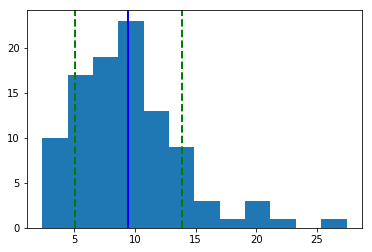

In [15]:
plt.hist(gamma1, linestyle = "solid",bins=12)
plt.axvline(gamma1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(gamma1.mean()+gamma1.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(gamma1.mean()-gamma1.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()


This looks somewhat normal, though it is missing the lower tail.  Let's see how this will show up in the NQP

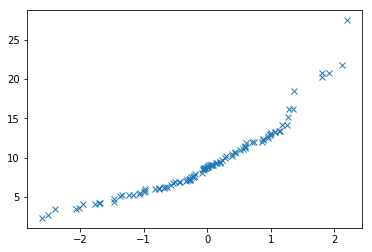

In [16]:
gamma1.sort()
plt.plot(norm,gamma1,"x")
plt.show()

### Geometric
The **geometric distribution** The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set { 1, 2, 3, ...}

\begin{equation}
P(X = k)= p (1-p)^{k-1}
\end{equation} 

As the probabilities will diminish as k grows, this suggests the distribution is strongly skewed.  If we considered the total of Geometric 20 trials, as we have with other distributions, this skewing would have been less pronounced.

In [17]:
geometric1 = np.random.geometric(.5,100)
print(geometric1.mean())
print(geometric1.std())

2.04
1.28778880256042


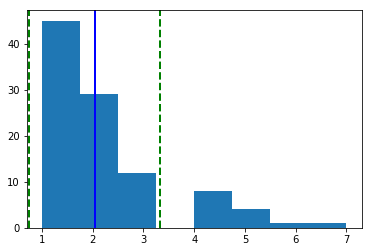

In [18]:
plt.hist(geometric1, linestyle = "solid",bins=8)
plt.axvline(geometric1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(geometric1.mean()+geometric1.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(geometric1.mean()-geometric1.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

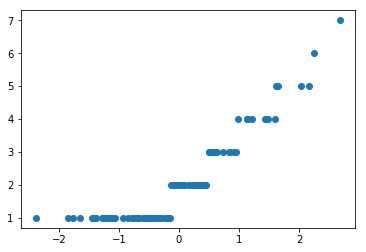

In [19]:
geometric1.sort()
norm = np.random.normal(0,1,100)
norm.sort()
plt.plot(norm,geometric1,"o")

plt.show()

Distinctly non-linear


### Logistic

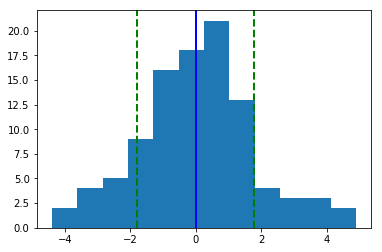

In [23]:
logisitic1 = np.random.logistic(0,1,100)
plt.hist(logisitic1, linestyle = "solid",bins=12)
plt.axvline(logisitic1.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(logisitic1.mean()+logisitic1.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(logisitic1.mean()-logisitic1.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

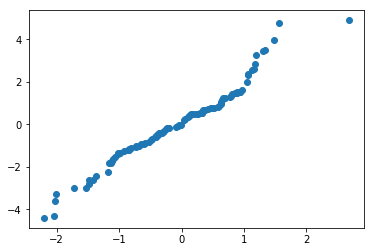

In [24]:
# The histogram above looks suprisingly normal.  Let's see what the NQP says.

logisitic1.sort()
norm = np.random.normal(0,1,100)
norm.sort()
plt.plot(norm,logisitic1,"o")

plt.show()

This is definitely NOT what I was expecting here.

## Adding different normal distributions
1. Generate two normally-distributed variables, one with a mean of 5 and standard deviation of 0.5, and the other with a mean of 10 and standard deviation of 1.
2. Add them together to create a third variable.
3. Graph the third variable using a histogram.
4. Compute the mean and standard deviation and plot them as vertical lines on the histogram.
5. Evaluate the descriptive statistics against the data.

In [31]:
v1 = np.random.normal(5,0.5,10000)
v2 = np.random.normal(10,1,10000)
v3 = v1 + v2
print(v3.mean(), v3.std())

14.99852319213283 1.122761000549076


When adding random variables, the mean of the resulting variable should be the sum of the initial means.
However, the __variances__ add, not the standard deviations.  Here, for example, the variance of v3 should be 1.25 and the stdev would be sqrt(1.25) or 1.118

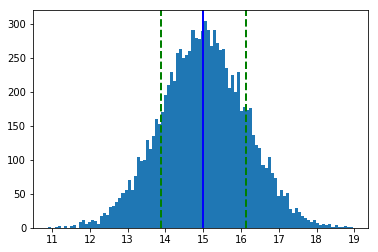

In [33]:
plt.hist(v3, linestyle = "solid",bins=100)
plt.axvline(v3.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(v3.mean()+v3.std(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(v3.mean()-v3.std(), color='g', linestyle='dashed', linewidth=2)
# Plot a histogram.
plt.show()

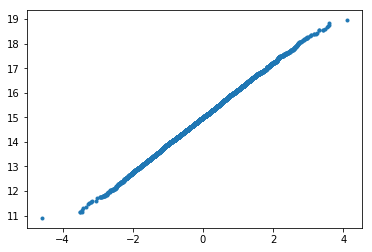

In [35]:
v3.sort()
myNorm = np.random.normal(0,1,10000)
myNorm.sort()
plt.plot(myNorm,v3,'.')
plt.show()